In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import imblearn

In [2]:
df_prompts = pd.read_csv('data/train_prompts.csv')
df_train = pd.read_csv('data/train_essays.csv')

In [3]:
df_train

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [4]:
df_train_an = df_train.copy()

In [5]:
df_train_an.drop(['id', 'prompt_id'], axis=1, inplace=True)
df_train_an['text_len'] = [len(text) for text in df_train_an['text']]

In [6]:
df_train_an

,text,generated,text_len
0,Cars. Cars have been around since they became ...,0,3289
1,Transportation is a large necessity in most co...,0,2738
2,"""America's love affair with it's vehicles seem...",0,4428
3,How often do you ride in a car? Do you drive a...,0,4013
4,Cars are a wonderful thing. They are perhaps o...,0,4698
...,...,...,...
1373,There has been a fuss about the Elector Colleg...,0,2406
1374,Limiting car usage has many advantages. Such a...,0,2073
1375,There's a new trend that has been developing f...,0,4339
1376,As we all know cars are a big part of our soci...,0,2810


In [7]:
df_train_an['text_len'].describe()

count    1378.000000
mean     3169.050798
std       920.588198
min      1356.000000
25%      2554.250000
50%      2985.500000
75%      3623.750000
max      8436.000000
Name: text_len, dtype: float64

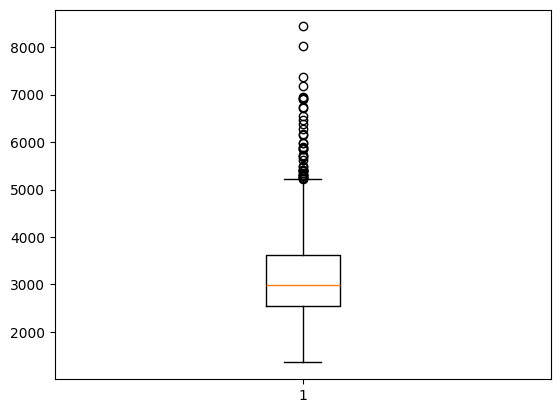

In [8]:
plt.boxplot(df_train_an['text_len']);

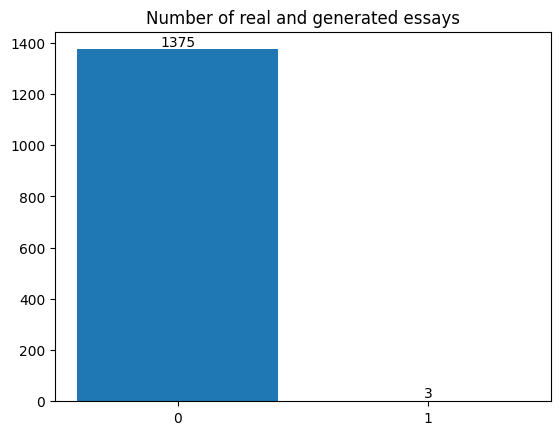

In [9]:
class_counts = df_train_an.generated.value_counts().values
class_names = df_train_an.generated.unique()
tick = [0,1]

fig, ax = plt.subplots()
bars = ax.bar(class_names, class_counts, tick_label=tick)
ax.bar_label(bars)
plt.title('Number of real and generated essays');

In [15]:
X = df_train[['text', 'prompt_id']].to_numpy()
y = df_train['generated'].to_numpy()

In [49]:
df_excerpts = pd.read_csv('data/excerpts.csv')

In [50]:
df_excerpts

,excerpt_id,excerpt_prompt,excerp_title,excerpt
0,0,cars,"In German Suburb, Life Goes On Without Cars by...","VAUBAN, Germany-Residents of this upscale comm..."
1,1,cars,Paris bans driving due to smog by Robert Duffer,"After days of near-record pollution, Paris enf..."
2,2,cars,Car-free day is spinning into a big hit in Bog...,"BOGOTA, Colombia-In a program that's set to sp..."
3,3,cars,The End of Car Culture by Elisabeth Rosenthal,President Obama's ambitious goals to curb the ...
4,4,electoral,What Is the Electoral College? by the Office o...,"The Electoral College is a process, not a plac..."
5,5,electoral,The Indefensible Electoral College: Why even t...,"What have Richard Nixon, Jimmy Carter, Bob Dol..."
6,6,electoral,In Defense of the Electoral College: Five reas...,The Electoral College is widely regarded as an...


In [51]:
df_addiditonal_texts = pd.read_csv('data/generated_additional_essays.csv')
df_addiditonal_texts['length'] = [len(text) for text in df_addiditonal_texts['text']]
df_addiditonal_texts

,text,length
0,"In the idyllic town of Vauban, Germany, a revo...",3697
1,"Vauban, Germany, a bold experiment is underway...",3760
2,In the sprawling landscapes of modern suburbi...,4082
3,Amidst the expansive landscapes of contemporar...,4460
4,"In recent years, the global conversation on en...",4327
5,"Paris, facing near-record pollution, implement...",1430
6,"As a tourist in the enchanting city of Paris, ...",3553
7,In an era marked by environmental consciousnes...,3421
8,In the pursuit of a sustainable and eco-friend...,3096
9,"In recent times, a transformative shift in Ame...",3757


In [46]:
df_train_an[df_train_an['generated'] == 1]['text'][704]

"This essay will analyze, discuss and prove one reason in favor of keeping the Electoral College in the United States for its presidential elections. One of the reasons to keep the electoral college is that it is better for smaller, more rural states to have more influence as opposed to larger metropolitan areas that have large populations. The electors from these states are granted two votes each. Those from larger, more populated areas are granted just one vote each. Smaller states tend to hold significant power because their two votes for president and vice president add up more than the votes of larger states that have many electors. This is because of the split of the electoral votes. Some argue that electors are not bound to vote for the candidate who won the most votes nationally. They do not have to vote for their own state's nominee unless their state has a winner take all system. However, there are states that have adopted laws that force their electors to vote for their stat

In [52]:
df_prompts

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...
